In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from datetime import datetime as dt



In [102]:
### load data ###
path='/Users/dylanjorling/UCLA/418/final_project/data/'
name='imdb_movies_oscar_analysis.csv'
data = pd.read_csv(path+name, index_col='id')
pd.options.display.max_columns = None
data.head()

,title,fullTitle,type,year,date,runtime,plot,awards,directors,writers,stars,genres,companies,languages,rating,imDbRatingCount,imDbRating,metacriticRating,budget,grossUSA,grossWorldwide,keywords,oscars_won,oscars_nom,award_wins,award_noms,dir_pop,wr_pop,star_power,company_size,release_month,inflation_index,adj_budget
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
tt0010323,The Cabinet of Dr. Caligari,The Cabinet of Dr. Caligari (1920),Movie,1920,1920-02-27,67.0,"Francis, a young man, recalls in his memory th...","Awards, 1 win & 1 nomination",Robert Wiene,"Carl Mayer, Hans Janowitz","Werner Krauss, Conrad Veidt, Friedrich Feher","Horror, Mystery, Thriller",Decla-Bioscop AG,German,Not Rated,62574,8.0,NaN,18000.0,8811.0,8811.0,"somnambulist,mental patient,sleepwalking,mind ...",0,0,1,2,1,1.000000,3,1,February,16.893128,3.040763e+05
tt0012349,The Kid,The Kid (1921),Movie,1921,1921-02-06,68.0,The opening title reads: A comedy with a smile...,"Top rated movie #129 | Awards, 2 wins",Charles Chaplin,Charles Chaplin,"Charles Chaplin, Edna Purviance, Jackie Coogan","Comedy, Drama, Family",Charles Chaplin Productions,English,Passed,124417,8.3,NaN,250000.0,NaN,41960.0,"orphan,the little tramp character,baby,boy,1910s",0,0,2,2,6,6.000000,8,6,February,14.613432,3.653358e+06
tt0013442,Nosferatu,Nosferatu (1922),Movie,1922,1922-05-18,94.0,"Wisbourg, Germany based estate agent Knock dis...","Awards, 1 win & 2 nominations",F.W. Murnau,"Henrik Galeen, Bram Stoker","Max Schreck, Alexander Granach, Gustav von Wan...","Fantasy, Horror","Jofa-Atelier Berlin-Johannisthal, Prana-Film GmbH","German, English",Not Rated,95262,7.9,NaN,NaN,NaN,19054.0,"vampire,gothic,expressionism,monster,silent film",0,0,1,3,1,2.000000,3,1,May,16.327857,NaN
tt0015324,Sherlock Jr.,Sherlock Jr. (1924),Movie,1924,1924-05-11,NaN,"A meek and mild projectionist, who also cleans...","Top rated movie #192 | Awards, 1 win",Buster Keaton,"Jean C. Havez, Joseph A. Mitchell, Clyde Bruckman","Buster Keaton, Kathryn McGuire, Joe Keaton","Action, Comedy, Romance",Buster Keaton Productions,"English, None",Passed,48380,8.2,NaN,NaN,977375.0,NaN,"false accusation,surrealism,national film regi...",0,0,1,1,1,1.333333,4,2,May,17.081100,NaN
tt0015648,Battleship Potemkin,Battleship Potemkin (1925),Movie,1925,1925-12-24,66.0,Based on the historical events the movie tells...,"Awards, 1 win",Sergei Eisenstein,"Nina Agadzhanova, Sergei Eisenstein, Grigoriy ...","Aleksandr Antonov, Vladimir Barskiy, Grigoriy ...","Drama, History, Thriller",Mosfilm,"Russian, English",Not Rated,57012,8.0,97.0,NaN,51198.0,61389.0,"imperial russian navy,1905 russian revolution,...",0,0,1,1,1,1.000000,3,6,December,17.081100,NaN


In [103]:
# clean adj_budget column
# individual point analysis, all points > $405m budget not in usd->filter
#following filters also in wrong currency:
df_box = data[data['adj_budget'] < 405000000] #drop >405m and nas
ids_out= ["tt0110413", "tt0120657", "tt0910970", "tt1182937", "tt1335975",
             "tt13462900", "tt1954470", "tt2239822"]

df_box = df_box.drop(index=ids_out)
df_box.head()

,title,fullTitle,type,year,date,runtime,plot,awards,directors,writers,stars,genres,companies,languages,rating,imDbRatingCount,imDbRating,metacriticRating,budget,grossUSA,grossWorldwide,keywords,oscars_won,oscars_nom,award_wins,award_noms,dir_pop,wr_pop,star_power,company_size,release_month,inflation_index,adj_budget
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
tt0010323,The Cabinet of Dr. Caligari,The Cabinet of Dr. Caligari (1920),Movie,1920,1920-02-27,67.0,"Francis, a young man, recalls in his memory th...","Awards, 1 win & 1 nomination",Robert Wiene,"Carl Mayer, Hans Janowitz","Werner Krauss, Conrad Veidt, Friedrich Feher","Horror, Mystery, Thriller",Decla-Bioscop AG,German,Not Rated,62574,8.0,NaN,18000.0,8811.0,8811.0,"somnambulist,mental patient,sleepwalking,mind ...",0,0,1,2,1,1.000000,3,1,February,16.893128,3.040763e+05
tt0012349,The Kid,The Kid (1921),Movie,1921,1921-02-06,68.0,The opening title reads: A comedy with a smile...,"Top rated movie #129 | Awards, 2 wins",Charles Chaplin,Charles Chaplin,"Charles Chaplin, Edna Purviance, Jackie Coogan","Comedy, Drama, Family",Charles Chaplin Productions,English,Passed,124417,8.3,NaN,250000.0,NaN,41960.0,"orphan,the little tramp character,baby,boy,1910s",0,0,2,2,6,6.000000,8,6,February,14.613432,3.653358e+06
tt0015864,The Gold Rush,The Gold Rush (1925),Movie,1925,1925-07-13,95.0,A lone prospector ventures into Alaska looking...,"Top rated movie #174 | Nominated for 2 Oscars,...",Charles Chaplin,Charles Chaplin,"Charles Chaplin, Mack Swain, Tom Murray","Adventure, Comedy, Drama",Charles Chaplin Productions,English,Passed,109609,8.2,NaN,923000.0,NaN,26916.0,"klondike,klondike gold rush,national film regi...",0,2,3,6,6,6.000000,8,6,July,17.081100,1.576585e+07
tt0017136,Metropolis,Metropolis (1927),Movie,1927,1927-03-13,153.0,"Sometime in the future, the city of Metropolis...","Top rated movie #116 | Awards, 6 wins & 7 nomi...",Fritz Lang,"Thea von Harbou, Fritz Lang","Brigitte Helm, Alfred Abel, Gustav Fröhlich","Drama, Sci-Fi",Universum Film (UFA),"German, English",Not Rated,171448,8.3,98.0,6000000.0,1236166.0,1349711.0,"dystopia,robot,futuristic,expressionism,tower ...",0,0,6,13,3,2.000000,3,1,March,16.515398,9.909239e+07
tt0017925,The General,The General (1926),Movie,1926,1927-01-02,67.0,After being rejected by the Confederate milita...,"Top rated movie #181 | Awards, 2 wins & 1 nomi...","Clyde Bruckman, Buster Keaton","Buster Keaton, Clyde Bruckman, Al Boasberg","Buster Keaton, Marion Mack, Glen Cavender","Action, Adventure, Comedy","Buster Keaton Productions, Joseph M. Schenck P...",None,Passed,89825,8.2,NaN,750000.0,NaN,NaN,"train,confederate army,national film registry,...",0,0,2,3,1,1.333333,4,2,January,16.515398,1.238655e+07


<AxesSubplot:>

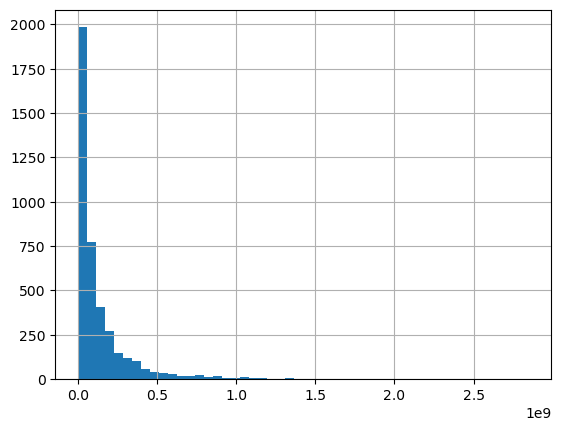

In [104]:
# drop na proftis
df_box = df_box.loc[df_box['grossWorldwide'].dropna().index]
df_box['grossWorldwide'].hist(bins=50)

In [105]:
# create inflation adj gross profit var
df_box['gross_profit_adj'] = (df_box['grossWorldwide'] - df_box['budget']) * df_box['inflation_index']
df_box[['gross_profit_adj', 'title']].sort_values('gross_profit_adj')

,gross_profit_adj,title
id,,
tt1166100,-2.279025e+08,Ghajini
tt9777666,-2.098691e+08,The Tomorrow War
tt0095250,-1.956492e+08,The Big Blue
tt5727282,-1.927343e+08,Borg vs. McEnroe
tt1302006,-1.840948e+08,The Irishman
tt7991608,-1.807202e+08,Red Notice
tt0112760,-1.736113e+08,Cutthroat Island
tt0180052,-1.533253e+08,The Adventures of Pluto Nash
tt4566758,-1.524246e+08,Mulan


In [106]:
# decide what to do with remaining nas
df_box = df_box.loc[df_box['rating'].dropna().index]
df_box = df_box.loc[df_box['runtime'].dropna().index]
df_box.isna().sum()


title                 0
fullTitle             0
type                  0
year                  0
date                  0
runtime               0
plot                  0
awards                0
directors             0
writers               0
stars                 0
genres                0
companies             0
languages             0
rating                0
imDbRatingCount       0
imDbRating            0
metacriticRating    121
budget                0
grossUSA            155
grossWorldwide        0
keywords              0
oscars_won            0
oscars_nom            0
award_wins            0
award_noms            0
dir_pop               0
wr_pop                0
star_power            0
company_size          0
release_month         0
inflation_index       0
adj_budget            0
gross_profit_adj      0
dtype: int64

In [107]:
# clean rating 
df_box['rating'].value_counts()
df_box['rating'].replace({'Unrated': 'Not Rated',
                       'TV-MA': 'R',
                       'Passed': 'PG',
                       'Approved': 'PG',
                       'TV-14': 'PG-13',
                       'NC-17': 'R',
                       'TV-PG': 'PG',
                       'GP': 'PG',
                       'X': 'R',
                       'M': 'R',
                       'M/PG': 'PG-13',
                       'TV-G': 'G'}, inplace=True)
df_box['rating'].value_counts()

R            1811
PG-13        1280
PG            708
G             116
Not Rated     112
Name: rating, dtype: int64

In [108]:
pd.options.display.max_rows = None
df_box['genres'].value_counts()

Comedy, Drama, Romance           154
Animation, Adventure, Comedy     148
Action, Adventure, Sci-Fi        135
Action, Crime, Drama             114
Comedy, Romance                  112
Action, Adventure, Comedy        102
Drama, Romance                    92
Comedy                            84
Action, Crime, Thriller           84
Crime, Drama, Mystery             83
Action, Adventure, Fantasy        81
Action, Comedy, Crime             78
Crime, Drama, Thriller            77
Horror, Mystery, Thriller         74
Action, Adventure, Drama          70
Comedy, Drama                     58
Action, Adventure, Thriller       57
Horror, Thriller                  56
Biography, Drama, History         55
Biography, Crime, Drama           48
Adventure, Comedy, Family         46
Horror                            43
Animation, Action, Adventure      43
Biography, Drama                  42
Drama, Mystery, Thriller          41
Crime, Drama                      40
Comedy, Crime, Drama              39
D

In [129]:
# clean genre
random.seed(100)
genre_list = []
for g in df_box['genres']:
    genre_list.append(g.split(','))
new_genres = [random.choice(g) for g in genre_list] # randomly select genre from list
df_box['new_genres'] = new_genres

In [138]:
name = 'box_office_data_final.csv'
df_box.to_csv(path + name)